# Spam dataset classification

In [121]:
import scipy.io as sio
import numpy as np
import random
import math
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import csv

## Data partitioning

In [35]:
# Read in the file
train_mat = sio.loadmat("spam_data.mat")
print(train_mat)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Jan 20 17:22:51 2017', 'test_data': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  3.,  0.,  0.]]), '__version__': '1.0', 'training_data': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  4.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.]]), 'training_labels': array([[1, 1, 1, ..., 0, 0, 0]], dtype=int64), '__globals__': []}


In [36]:
# Understand the data content
train_mat.keys()

dict_keys(['__header__', 'test_data', '__version__', 'training_data', 'training_labels', '__globals__'])

In [37]:
# Get the training data
train_data = train_mat['training_data']
train_data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  4.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.]])

In [38]:
# Get the training label
train_labels = train_mat['training_labels']
train_labels

array([[1, 1, 1, ..., 0, 0, 0]], dtype=int64)

In [39]:
# Check the amount of data in the training set
print(train_data.shape)
print(train_labels.shape)

(5172, 32)
(1, 5172)


In [40]:
# Set aside 20% training sample as a validation set

size = int(math.ceil(train_data.shape[0] * 0.2))
validation_index = np.array(random.sample(range(train_data.shape[0]), size))
validation_data = train_data[validation_index]
validation_labels = train_labels[0][validation_index]

In [47]:
# Verify the validation set size
print(validation_data)
print(validation_data.shape )
print(validation_labels)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  2.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(1035, 32)
[1 0 0 ..., 0 0 1]


In [42]:
# Construct the training set
training_data = np.delete(train_data, validation_index, 0)
training_labels = np.delete(train_labels[0], validation_index, 0)
print(training_data.shape)
print(training_labels.shape)

(4137, 32)
(4137,)


## SVM

### Training on n examples

In [112]:
def training_classifier(n):
    # Get n training data
    while(True):
        sample_index = np.array(random.sample(range(training_data.shape[0]), n))
        training_data1 = training_data[sample_index]
        training_labels1 = training_labels[sample_index]
        if(len(np.unique(training_labels1)) != 1):
            break
    print(training_data1.shape)
    print(training_labels1.shape)
    # Build the SVC classifier
    classifier1 = SVC(kernel='linear')
    classifier1.fit(training_data1, training_labels1)
    # Make prediction
    score1 = classifier1.score(validation_data, validation_labels)
    print("accuracy score", score1)
    accuracy_score.append(score1)

In [113]:
accuracy_score = []
training_size = [100, 200, 500, 1000, 2000, training_data.shape[0]]
for n in training_size:
    training_classifier(n)
print(accuracy_score)

(100, 32)
(100,)
accuracy score 0.769082125604
(200, 32)
(200,)
accuracy score 0.757487922705
(500, 32)
(500,)
accuracy score 0.781642512077
(1000, 32)
(1000,)
accuracy score 0.782608695652
(2000, 32)
(2000,)
accuracy score 0.786473429952
(4137, 32)
(4137,)
accuracy score 0.788405797101
[0.76908212560386469, 0.75748792270531407, 0.78164251207729474, 0.78260869565217395, 0.78647342995169078, 0.78840579710144931]


## Plot the accuracy score 

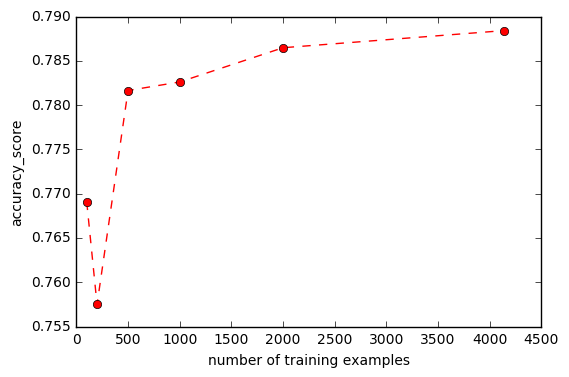

In [114]:
plt.plot(training_size, accuracy_score, "r--")
plt.plot(training_size, accuracy_score, "ro")
plt.ylabel("accuracy_score")
plt.xlabel("number of training examples")
plt.show()

## K-Fold Cross-Validation

In [100]:
k = 5
C_s = np.array([math.pow(10, 1), math.pow(10, 0), math.pow(10, -1), math.pow(10, -2),
      math.pow(10, -3), math.pow(10, -4), math.pow(10, -5),math.pow(10, -6), 
      math.pow(10, -7),math.pow(10, -8),math.pow(10, -10), math.pow(10, -20),
      math.pow(10, -30)])
svc = SVC(kernel='linear')

In [101]:
# Start the cross-validation
accuracy_scores = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, training_data, training_labels, n_jobs=1)
    accuracy_scores.append(np.mean(this_scores))
print(accuracy_scores)


[0.80275562001450329, 0.79888808315204252, 0.79381194102006292, 0.77205704616872117, 0.74450084602368871, 0.71356055112400296, 0.70993473531544593, 0.70993473531544593, 0.70993473531544593, 0.70993473531544593, 0.70993473531544593, 0.70993473531544593, 0.70993473531544593]


In [106]:
svc.C = 12
this_scores = cross_val_score(svc, training_data, training_labels, n_jobs=1)
this_scores

array([ 0.81145758,  0.80348078,  0.79260334])

In [108]:
np.mean(this_scores)

0.80251389896059955

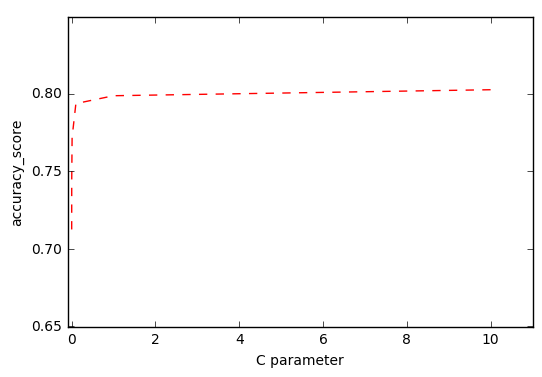

In [107]:
plt.plot(C_s, accuracy_scores, "r--")
plt.ylabel("accuracy_score")
plt.xlabel("C parameter")
plt.axis([-0.1, 11, 0.65, 0.85])
plt.show()

## Kaggel Prediction

In [137]:
# Get the test data
test_data = train_mat['test_data']
test_data
# Choose the best C parameter
best_c = math.pow(10, 1)

# Make predictions
best_clf = SVC(C = best_c, kernel='linear')
best_clf.fit(training_data, training_labels)
predictions = best_clf.predict(test_data)

In [138]:
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Write the prediction to csv file

In [139]:
i = 0
with open('spam_submission.csv', 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['Id'] + ['Category'])
    for num in predictions:
        writer.writerow([i] + [num])
        i += 1